# Проектная работа. Самокаты GoFast

Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки:
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra:
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.


- Задачи:

    - Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
    - Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
    - Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
    - Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
    - Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
    - Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.
    
- План работы:
    - Изучение данных
    - Предобработка данных
    - Анализ данных
    - Объединение таблиц
    - Подсчёт выручки
    - Проверка гипотез

## Общая информация

### Загрузка модулей

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import random

from scipy import stats as st
from math import factorial

### Настройки

In [2]:
RANDOM_STATE = 12345
state = np.random.RandomState(RANDOM_STATE)
# Цветовая палитра документа
cm = 'crest'
mec = 'gray'
alpha = 0.7
fontsize = 20
figsize_base = 5

def new_color(x='r'):
    '''Цвет графиков, по умолчанию случайный из заданной цветовой палитры. Принимает в качестве аргумента число, \
    соответствующее цвету в палитре.'''
    if x == 'r':
        return list(sns.color_palette(cm, 20)[random.randint(0,19)])
    return list(sns.color_palette(cm, 20)[x])
# Размеры

def figsize(width = 1, height=1):
    '''Задание размеров окна отрисовки.'''
    return (width*figsize_base, height*figsize_base)

# Отрисовка 
def plot_set(ax,title='',xlabel='',ylabel='',fontsize=fontsize,xrot=True,figsize=figsize()):
    '''Функция для отрисовки дополнительных параметров графиков. Подписьи осей и названия, размер шрифта и размер окна, 
    включение сетки.'''
    plt.xticks(rotation=90*int(xrot), fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(title+'\n', fontsize=fontsize)
    plt.xlabel('\n'+xlabel, fontsize=fontsize)
    plt.ylabel(ylabel+'\n', fontsize=fontsize)
    plt.grid(True)
    None
    
def mean_percent(x):
    '''Функция для форматирования значений. Округление до сотых и знак процента.'''
    try:
        return "{0:.2%}".format(x)
    except:
        return x

### Изучение данных

In [3]:
user_data = pd.read_csv('users_go.csv')
rides_data = pd.read_csv('rides_go.csv')
subscriptions_data = pd.read_csv('subscriptions_go.csv')

#### Таблица  пользователей

In [4]:
user_data.head(15)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
user_data.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


#### Таблица поездок

In [7]:
rides_data.head(15)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
rides_data.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


#### Таблица тарифов

In [10]:
subscriptions_data

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [12]:
subscriptions_data.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


#### Вывод этапа
- Изучены данные датафреймов:
    - `users_go.csv`
        - 5 столбцов
            - `user_id`	уникальный идентификатор пользователя
            - `name`	имя пользователя
            - `age`	возраст
            - `city`	город
            - `subscription_type`	тип подписки (`free`, `ultra`)
        - 1565 строк
    - `rides_go.csv`
        - 4 столбца
            - `user_id`	уникальный идентификатор пользователя
            - `distance`	расстояние, которое пользователь проехал в текущей сессии (в метрах)
            - `duration`	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
            - `date`	дата совершения поездки
        - 18068 строк
    - `subscriptions_go.csv`
        - 4 столбца
            - `subscription_type`	тип подписки
            - `minute_price`	стоимость одной минуты поездки по данной подписке
            - `start_ride_price`	стоимость начала поездки
            - `subscription_fee`	стоимость ежемесячного платежа
        - 2 строки

### Предобработка данных

#### Пропуски и дубликаты

In [13]:
user_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
user_data.duplicated().sum()

31

In [15]:
user_data = user_data.drop_duplicates().reset_index(drop=True)

Пропуски отсутствуют, дубликаты обработаны.

In [16]:
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [17]:
rides_data.duplicated().sum()

0

18068 строк, пропущенных данных нет. Дубликатов нет.

#### Изменение типов данных

Изменим типы данных. Приведем столбец `date` из датафрейма `rides_data` к типу даты

In [18]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format = '%Y-%m-%d')

Добавим столбец `month` с номером месяца

In [19]:
rides_data['date'].min()

Timestamp('2021-01-01 00:00:00')

In [20]:
rides_data['date'].max()

Timestamp('2021-12-30 00:00:00')

Данные за один календарный год.

In [21]:
rides_data['month'] = rides_data['date'].dt.month

### Вывод этапа

Пропущенных данных в таблицах нет.
Найден 31 дубликат. Все дубликаты в таблице пользователей удалены.
Изменены типы данных:`date` на `datetime64`. Добавлен столбец `month` с номер месяца.

## Исследовательский анализ данных

### Таблица  пользователей

Рассмотрим распределение возрастов:

In [22]:
user_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

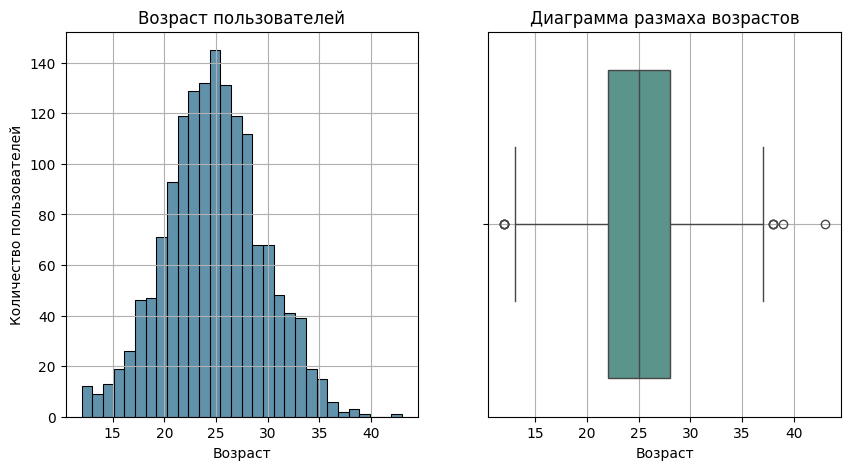

In [23]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.histplot(user_data['age'],color=new_color(),alpha=alpha)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.subplot(1,2,2)
sns.boxplot(x = user_data['age'], color=new_color())
plt.title('Диаграмма размаха возрастов')
plt.xlabel('Возраст')
plt.grid(True)
None

In [24]:
col = 'age'
an_ls = user_data[col].describe()['25%'] - 1.5 * (user_data[col].describe()['75%'] - user_data[col].describe()['25%'])
an_gr = user_data[col].describe()['75%'] + 1.5 * (user_data[col].describe()['75%'] - user_data[col].describe()['25%'])
md = user_data[col].describe()['50%']
print(f'Медианное значение {md:.2f}. Аномальные значения меньше {an_ls:.0f} и больше {an_gr:.0f}')

Медианное значение 25.00. Аномальные значения меньше 13 и больше 37


Рассмотрим распределение городов:

In [25]:
user_data['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

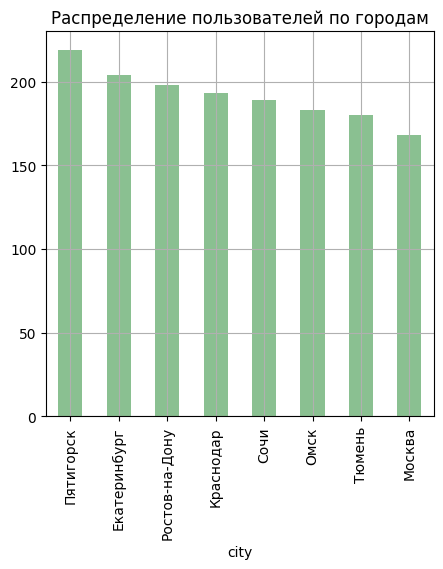

In [26]:
user_data['city'].value_counts().plot(
    kind = 'bar',
    figsize=figsize(), 
    title = 'Распределение пользователей по городам',color=new_color());
plt.grid(True)
None

Рассмотрим распределение подписок:

In [27]:
user_data['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

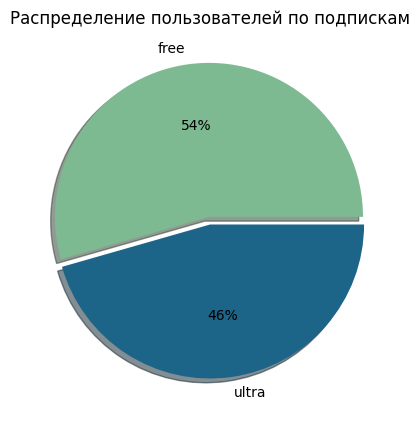

In [28]:
user_data['subscription_type'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    figsize=figsize(), 
    title = 'Распределение пользователей по подпискам',
    colors=[new_color(2),new_color(14)],explode = (0.05,0), shadow=True);
plt.ylabel('')
None

### Таблица  поездок

In [29]:
rides_data['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

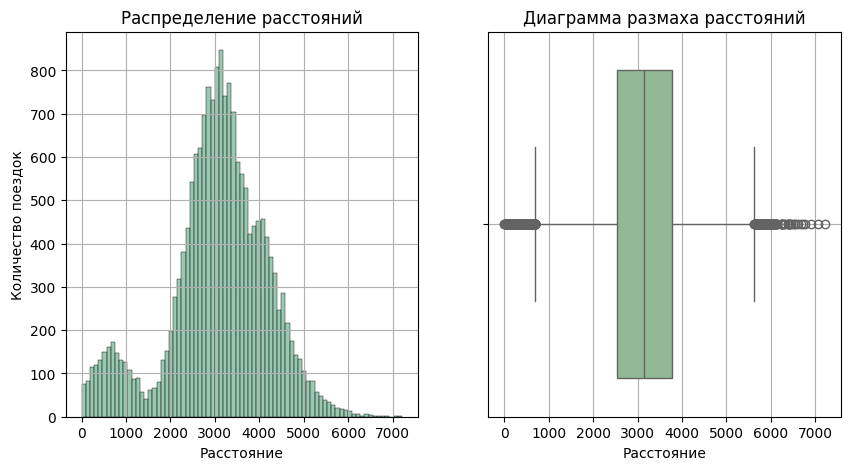

In [30]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.histplot(rides_data['distance'],color=new_color(),alpha=alpha)
plt.title('Распределение расстояний')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.subplot(1,2,2)
sns.boxplot(x = rides_data['distance'], color=new_color())
plt.title('Диаграмма размаха расстояний')
plt.xlabel('Расстояние')
plt.grid(True)
None

Появляется два отчётливых пика: около 800 метров и 3200. Возможно это связано с различными целями поездки. Кто то использует самокат чтобы добраться до пункта назначения, а кто то просто хочет прокатиться и развеяться.

In [31]:
col = 'distance'
an_ls = rides_data[col].describe()['25%'] - 1.5 * (rides_data[col].describe()['75%'] - rides_data[col].describe()['25%'])
an_gr = rides_data[col].describe()['75%'] + 1.5 * (rides_data[col].describe()['75%'] - rides_data[col].describe()['25%'])
md = rides_data[col].describe()['50%']
print(f'Медианное значение {md:.2f}. Аномальные значения меньше {an_ls:.2f} и больше {an_gr:.2f}')

Медианное значение 3133.61. Аномальные значения меньше 693.73 и больше 5625.72


In [32]:
rides_data['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

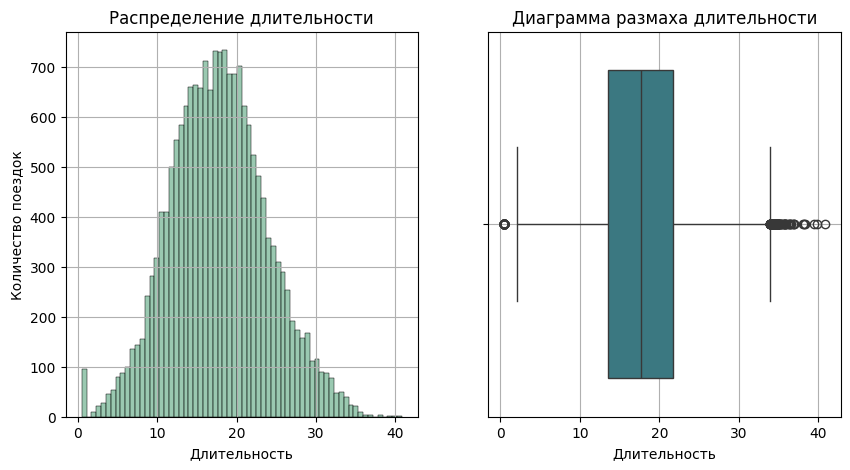

In [33]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.histplot(rides_data['duration'],color=new_color(),alpha=alpha)
plt.title('Распределение длительности')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.subplot(1,2,2)
sns.boxplot(x = rides_data['duration'], color=new_color())
plt.title('Диаграмма размаха длительности')
plt.xlabel('Длительность')
plt.grid(True)
None

In [34]:
col = 'duration'
an_ls = rides_data[col].describe()['25%'] - 1.5 * (rides_data[col].describe()['75%'] - rides_data[col].describe()['25%'])
an_gr = rides_data[col].describe()['75%'] + 1.5 * (rides_data[col].describe()['75%'] - rides_data[col].describe()['25%'])
md = rides_data[col].describe()['50%']
print(f'Медианное значение {md:.2f}. Аномальные значения меньше {an_ls:.2f} и больше {an_gr:.2f}')

Медианное значение 17.68. Аномальные значения меньше 1.41 и больше 33.92


In [35]:
rides_data[rides_data['duration']<1.4].head(25)

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
6860,724,6225.520342,0.5,2021-12-16,12
6883,726,4452.491518,0.5,2021-03-01,3
7018,735,4406.954812,0.5,2021-04-13,4
7160,745,5286.167732,0.5,2021-08-17,8
7364,760,4881.391865,0.5,2021-08-29,8


95 строчек с длительностью 0.5 секунд. При этом расстояния достаточно большие. Похоже ошибка в записи времени. Стоит заменить медианной длительностью поездок примерно того же расстояния. 

In [36]:
for t in (rides_data['distance'] // 100 * 100).unique():
    rides_data.loc[(rides_data['distance'] > t) & (rides_data['distance'] <= t + 100) & (rides_data['duration']==0.5), 'duration'] = \
    rides_data.loc[(rides_data['distance'] > t) & (rides_data['distance'] <= t + 100) & (rides_data['duration']!=0.5), 'duration'].median()
rides_data.dropna(subset=['duration'], inplace=True)

In [37]:
rides_data['month'].describe()

count    18067.000000
mean         6.486910
std          3.437455
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64

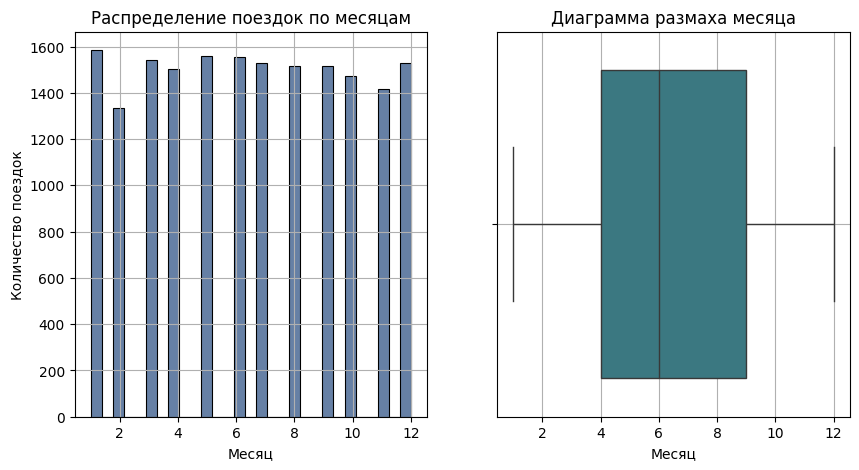

In [38]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.histplot(rides_data['month'],color=new_color(),alpha=alpha)
plt.title('Распределение поездок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.subplot(1,2,2)
sns.boxplot(x = rides_data['month'], color=new_color())
plt.title('Диаграмма размаха месяца')
plt.xlabel('Месяц')
plt.grid(True)
None

Аномальных месяцев нет

### Вывод этапа

Частота встречаемости городов

Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.

Соотношение пользователей с подпиской и без подписки

Пользователей, использующих бесплатную подписку больше - 835 человек, что является $\approx54%$ от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является $\approx46%$.

Возраст пользователей

Самыми младшими являются пользователи 12, 13 лет - аномальные значения.
Самыми старшими - 43, 39  - аномальные значения.
В целом, пользователи приложения укладываются в промежуток от 20 до 30 лет.

Расстояние, которое пользователь преодолел за одну поездку

Медианное значение 3134.00. Аномальные значения меньше 693 и больше 5627

Продолжительность поездок

Медианное значение 18.00. Аномальные значения меньше 2.00 и больше 34.00

Дополнительно обработаны аномальные значения длительности поездок. Ошибки заменены медианными значениями дличельностей поездок тех же расстояний.

## Объединение данных

In [39]:
full_data = user_data.merge(rides_data, how = 'left', left_on='user_id', right_on='user_id')
full_data = full_data.merge(subscriptions_data, how = 'left', left_on='subscription_type', right_on='subscription_type')
full_data.head(25)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [40]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18067 entries, 0 to 18066
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18067 non-null  int64         
 1   name               18067 non-null  object        
 2   age                18067 non-null  int64         
 3   city               18067 non-null  object        
 4   subscription_type  18067 non-null  object        
 5   distance           18067 non-null  float64       
 6   duration           18067 non-null  float64       
 7   date               18067 non-null  datetime64[ns]
 8   month              18067 non-null  int32         
 9   minute_price       18067 non-null  int64         
 10  start_ride_price   18067 non-null  int64         
 11  subscription_fee   18067 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Ничего не потеряли и не добавили лишнего

In [41]:
free_data = full_data.loc[full_data.loc[:,'subscription_type'] == 'free',:].copy()
ultra_data = full_data.loc[full_data['subscription_type'] == 'ultra',:].copy()

### Тариф без подписки

Визуализируем информацию о расстоянии и длительности на бесплатном тарифе.

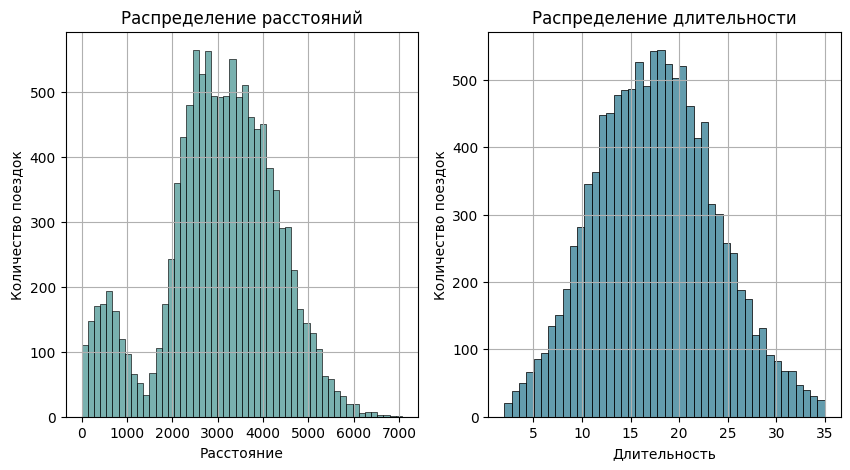

In [42]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.histplot(free_data['distance'],color=new_color(),alpha=alpha)
plt.title('Распределение расстояний')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.subplot(1,2,2)
sns.histplot(free_data['duration'],color=new_color(),alpha=alpha)
plt.title('Распределение длительности')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.grid(True)
None

В распределении расстояний видно два пика, один около 500 м, второй около 3000.

В распределении времени один пик около 18 минут. Есть повышенные значения около 0.

### Тариф с подпиской

Визуализируем информацию о расстоянии и длительности на платном тарифе.

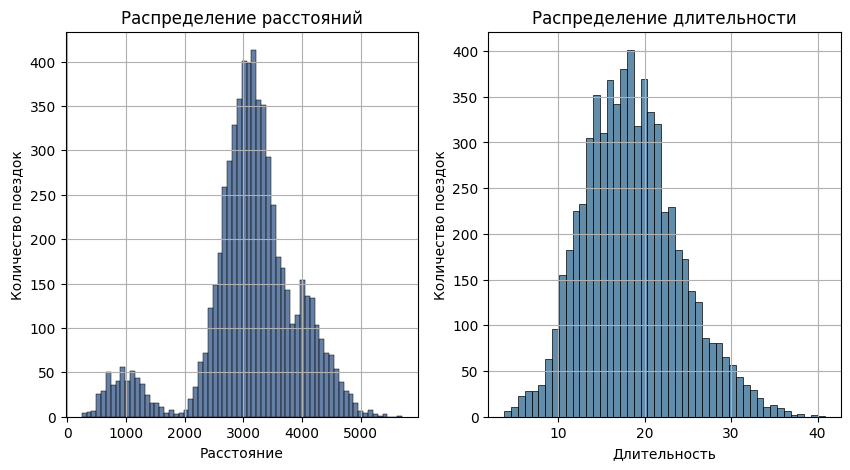

In [43]:
plt.figure(figsize=figsize(2))
plt.subplot(1,2,1)
sns.histplot(ultra_data['distance'],color=new_color(),alpha=alpha)
plt.title('Распределение расстояний')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.subplot(1,2,2)
sns.histplot(ultra_data['duration'],color=new_color(),alpha=alpha)
plt.title('Распределение длительности')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.grid(True)
None

В распределении расстояний видно два пика, один около 1000 м, второй около 3200.

В распределении времени один пик около 20 минут. Нет повышенных значений около 0.

### Сравнение

Сравним информацию о расстоянии и длительности на платном и бесплатном тарифах.

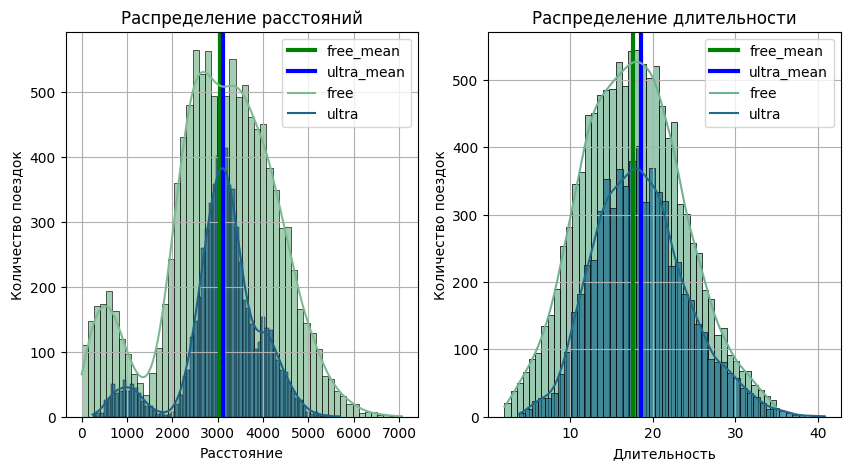

In [44]:
plt.figure(figsize=figsize(2))
ax1 = plt.subplot(1,2,1)
plt.axvline(x = free_data['distance'].mean(), color = 'g',linewidth=3)
plt.axvline(x = ultra_data['distance'].mean(), color = 'b',linewidth=3)
sns.histplot(free_data['distance'],color=new_color(2),ax=ax1,alpha=alpha,kde=True)
sns.histplot(ultra_data['distance'],color=new_color(14),ax=ax1,alpha=alpha,kde=True)
plt.title('Распределение расстояний')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.legend(['free_mean','ultra_mean','free','ultra'])
plt.grid(True)
ax2 = plt.subplot(1,2,2)
plt.axvline(x = free_data['duration'].mean(), color = 'g',linewidth=3)
plt.axvline(x = ultra_data['duration'].mean(), color = 'b',linewidth=3)
sns.histplot(free_data['duration'],color=new_color(3),ax=ax2,alpha=alpha,kde=True)
sns.histplot(ultra_data['duration'],color=new_color(13),ax=ax2,alpha=alpha,kde=True)
plt.title('Распределение длительности')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.legend(['free_mean','ultra_mean','free','ultra'])
None

Разница в средних расстояниях пользователей с подпиской и без достаточно мала. Однако на платном тарифе несколько выше.
Разница в длительности более заметна.

### Вывод этапа

Данные о пользователях, поездках и тарифах объеденены в один датафрейм - `full_data`.

Выделили два датафрейма на основе `full_data`:
- `free_data` - Информация о пользователях с бесплатным тарифом.
- `ultra_data` - Информация о пользователях с платным тарифом.

Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Разница в средних расстояниях пользователей с подпиской и без достаточно мала. Однако на платном тарифе несколько выше. Разница в длительности более заметна - платные пользователи ездят дольше.

## Подсчёт выручки

Округлим время проезда для посчётов.

In [45]:
free_data['duration'] = np.ceil(free_data['duration'])
ultra_data['duration'] = np.ceil(ultra_data['duration'])

Формула для подсчёта платы

In [46]:
def pay(row):
    return row['minute_price'] * row['duration'] + row['start_ride_price'] * row['count'] + row['subscription_fee']

### Тариф без подписки

Найдем суммарное расстояние, суммарное время и количество поeздок для каждого пользователя без подписки за каждый месяц.

In [47]:
free_pivot = free_data.pivot_table(index=['user_id','month'], values = ['distance', 'duration', 'name', 'minute_price', 'start_ride_price', 'subscription_fee'],aggfunc={'distance': 'sum', 'duration': 'sum', 'name': 'count','minute_price': 'first', 'start_ride_price': 'first', 'subscription_fee': 'first'}).rename(columns={'name': 'count'})
free_pivot['pay'] = free_pivot.apply(pay, axis=1)
free_pivot.head(25).style.background_gradient(cmap=cm)

Построим распределение трат в месяц пользователей без подписки.

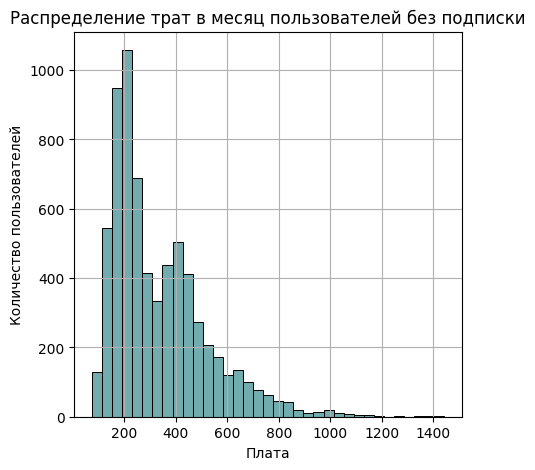

In [48]:
plt.figure(figsize=figsize())
sns.histplot(free_pivot['pay'],bins=35,color=new_color(),alpha=alpha)
plt.title('Распределение трат в месяц пользователей без подписки')
plt.xlabel('Плата')
plt.ylabel('Количество пользователей')
plt.grid(True)
None

### Тариф с подпиской

Найдем суммарное расстояние, суммарное время и количество поeздок для каждого пользователя с подпиской за каждый месяц.

In [49]:
ultra_pivot = ultra_data.pivot_table(index=['user_id','month'], values = ['distance', 'duration', 'name', 'minute_price', 'start_ride_price', 'subscription_fee'],aggfunc={'distance': 'sum', 'duration': 'sum', 'name': 'count','minute_price': 'first', 'start_ride_price': 'first', 'subscription_fee': 'first'}).rename(columns={'name': 'count'})
ultra_pivot['pay'] = ultra_pivot.apply(pay, axis=1)
ultra_pivot.head(25).style.background_gradient(cmap=cm)

Построим распределение трат в месяц пользователей с подпиской.

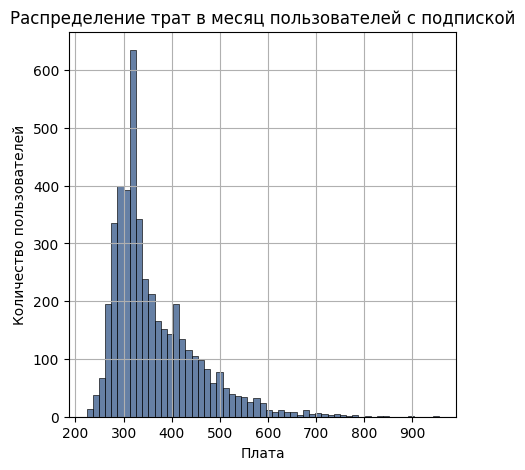

In [50]:
plt.figure(figsize=figsize())
sns.histplot(ultra_pivot['pay'],color=new_color(),alpha=alpha)
plt.title('Распределение трат в месяц пользователей с подпиской')
plt.xlabel('Плата')
plt.ylabel('Количество пользователей')
plt.grid(True)
None

### Сравнение

Сравним траты.

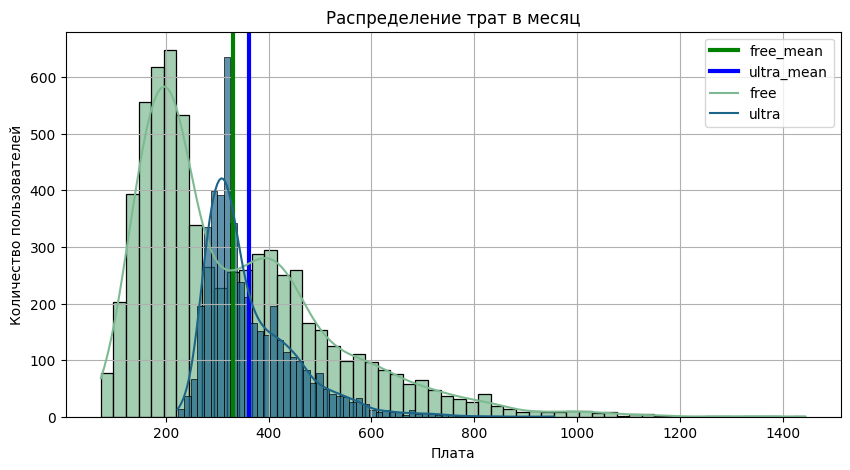

In [51]:
plt.figure(figsize=figsize(2))
plt.axvline(x = free_pivot['pay'].mean(), color = 'g',linewidth=3)
plt.axvline(x = ultra_pivot['pay'].mean(), color = 'b',linewidth=3)
ax1 = sns.histplot(free_pivot['pay'],color=new_color(2),alpha=alpha,kde=True)
sns.histplot(ultra_pivot['pay'],color=new_color(14),alpha=alpha,ax=ax1,kde=True)
plt.title('Распределение трат в месяц')
plt.xlabel('Плата')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.legend(['free_mean','ultra_mean','free','ultra'])
None

Траты пользователей с подпиской в среднем выше пользователей без подписки.

### Выгодна ли подписка?

Сравним, сколько заплатили бы пользователи без подписки, если бы у них была подписка. И наоборот, пользователи с подпиской, если бы её не было.

In [52]:
def free_pay(dur, count):
    return 8 * np.ceil(dur) + 50 * count
def ultra_pay(dur, count):
    return 6 * np.ceil(dur) + 0 * count + 199

In [53]:
ultra_pivot['may_pay'] = free_pay(ultra_pivot['duration'],ultra_pivot['count'])
free_pivot['may_pay'] = ultra_pay(free_pivot['duration'],free_pivot['count'])

In [54]:
ultra_pivot['delta'] = ultra_pivot['pay'] - ultra_pivot['may_pay'] 
ultra_pivot.head(25).style.background_gradient(cmap=cm)

In [55]:
free_pivot['delta'] = free_pivot['may_pay'] - free_pivot['pay'] 
free_pivot.head(25).style.background_gradient(cmap=cm)

Последний столбец показывает, насколько с подпиской дороже (или было бы дороже), чем без неё.

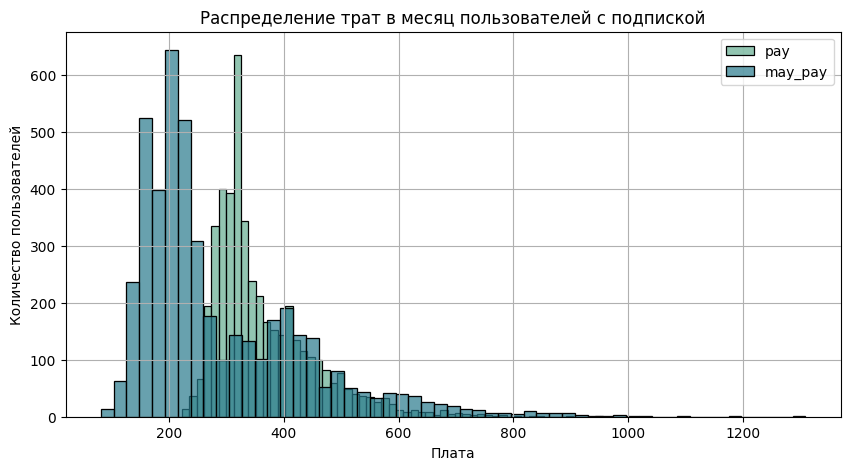

In [56]:
plt.figure(figsize=figsize(2))
ax = sns.histplot(ultra_pivot['pay'],color=new_color(4),alpha=alpha)
sns.histplot(ultra_pivot['may_pay'],ax=ax,color=new_color(11),alpha=alpha)
plt.title('Распределение трат в месяц пользователей с подпиской')
plt.xlabel('Плата')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.legend(['pay','may_pay'])
None

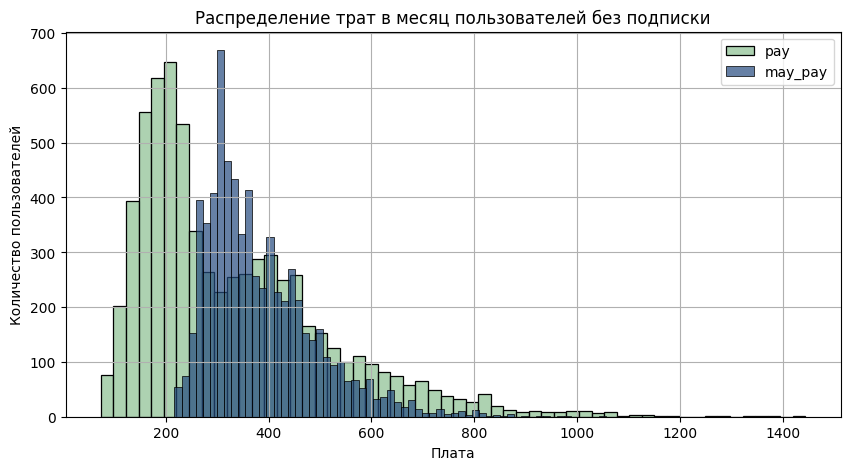

In [57]:
plt.figure(figsize=figsize(2))
ax = sns.histplot(free_pivot['pay'],color=new_color(1),alpha=alpha)
sns.histplot(free_pivot['may_pay'],ax=ax,color=new_color(17),alpha=alpha)
plt.title('Распределение трат в месяц пользователей без подписки')
plt.xlabel('Плата')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.legend(['pay','may_pay'])
None

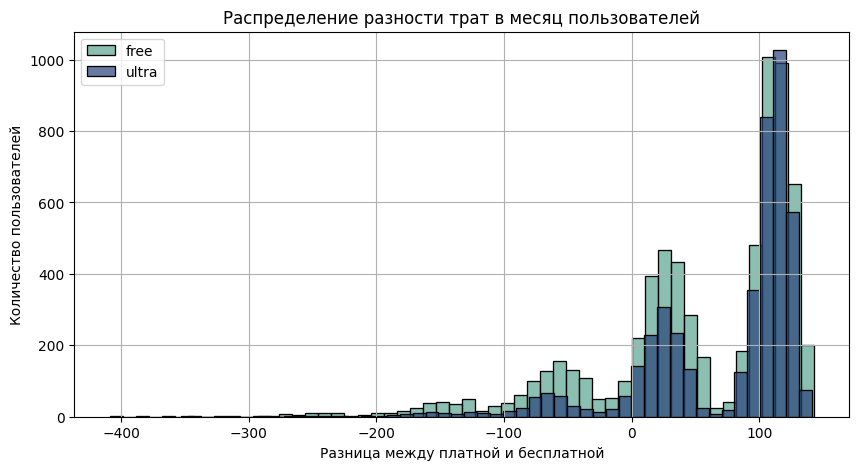

In [58]:
plt.figure(figsize=figsize(2))
ax = sns.histplot(free_pivot['delta'],color=new_color(5),alpha=alpha)
sns.histplot(ultra_pivot['delta'],ax=ax,color=new_color(18),alpha=alpha)
plt.title('Распределение разности трат в месяц пользователей')
plt.xlabel('Разница между платной и бесплатной')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.legend(['free','ultra'])
None

Есть пользователи которым выгодна подписка, есть пользователи без подписки, которым она бы была выгодна. Но в большенстве случаев она лишь увеличивает плату. Если у подписки нет других преимуществ, стоит пересмотреть тарифы, чтобы не терять лояльность аудитории.

### Вывод этапа

Создан новый датафрейм с агрегированными данными `total_data` на основе датафрейма с объединенными данными `full_data`.

Нашйдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавлен столбец с помесячной выручкой, которую принес каждый пользователь.

В среднем польщователи без подписки тратят больше чем пользователи без подписки. Более того, езда без подписки оказывается в большинстве случаев более выгодной.

## Проверка гипотез

### Гипотеза 1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Нулевая гипотеза: пользователи с подпиской тратят столько же времени на поездки, как и пользователи на бесплатном тарифе. 
Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе. 

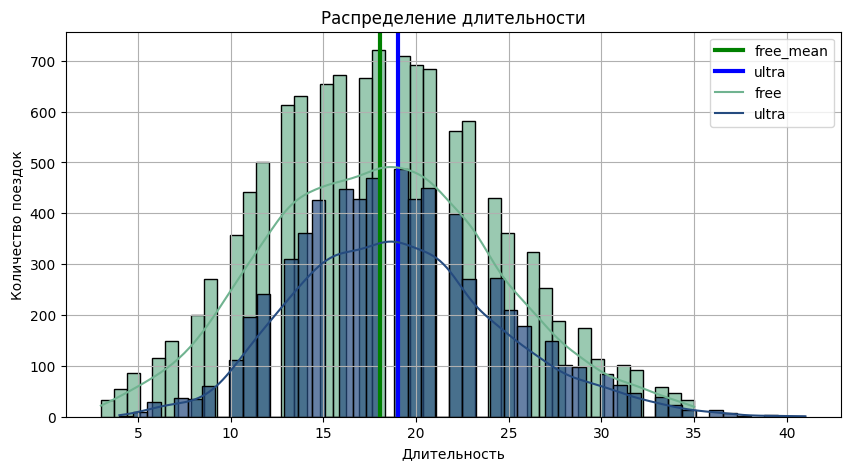

In [59]:
plt.figure(figsize=figsize(2))
ax = plt.axvline(x = free_data['duration'].mean(), color = 'g',linewidth=3)
plt.axvline(x = ultra_data['duration'].mean(), color = 'b',linewidth=3)
sns.histplot(free_data['duration'],color=new_color(3),alpha=alpha,kde=True)
sns.histplot(ultra_data['duration'],color=new_color(17),alpha=alpha,kde=True)
plt.title('Распределение длительности')
plt.xlabel('Длительность')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.legend(['free_mean','ultra','free','ultra'])
None

In [60]:
ultra_dur = np.ceil(ultra_data['duration'])

free_dur = np.ceil(free_data['duration'])

results = st.ttest_ind(free_dur, ultra_dur)
Alpha = 0.05

print(results.pvalue)
print(f'Среднее время на платном тарифе {ultra_data["duration"].mean()}, среднее время на бесплатном тарифе {free_data["duration"].mean()}')
if results.pvalue < Alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

3.3271062106400953e-25
Среднее время на платном тарифе 19.037692307692307, среднее время на бесплатном тарифе 18.07789400881819
Отвергаем нулевую гипотезу


#### Вывод
Вероятнее всего, подписчики тратят  больше времени на поездки (p-Value близка к нулю). Среднее время на платном тарифе 18.54, среднее время на бесплатном тарифе 17.39

### Гипотеза 2

 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая гипотеза: пользователи с подпиской проезжают за одну поездку в среднем 3130 метров. 
Альтернативная гипотеза: пользователи с подпиской проезжают за одну поездку в среднем более 3130 метров.

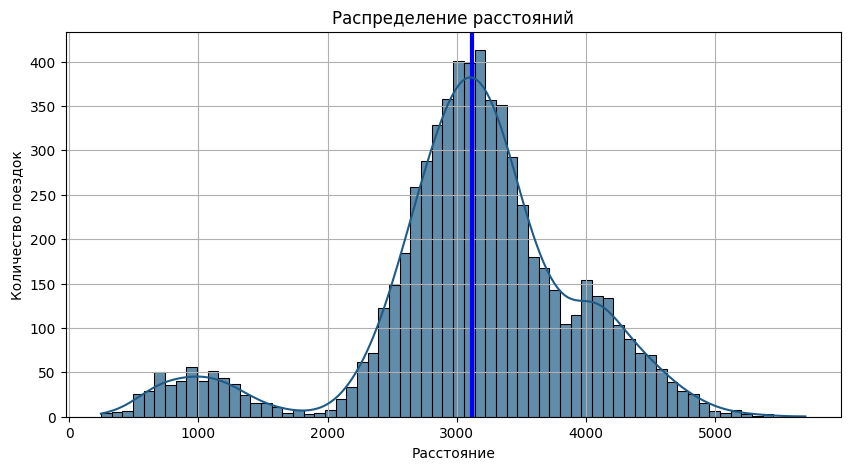

In [61]:
plt.figure(figsize=figsize(2))
plt.axvline(x = ultra_data['distance'].mean(), color = 'b',linewidth=3)
sns.histplot(ultra_data['distance'],color=new_color(15),alpha=alpha,kde=True)
plt.title('Распределение расстояний')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.grid(True)

In [62]:
ultra_dist = ultra_data['distance']

interested_value = 3130.0

Alpha = 0.05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

print(f'пользователи с подпиской проезжают за одну поездку в среднем {ultra_dist.mean()}')

if (results.pvalue < Alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
пользователи с подпиской проезжают за одну поездку в среднем 3115.4453880370247
Не удалось отвергнуть нулевую гипотезу


#### Вывод
Вероятнее всего, в среднем пользователи с подпиской проезжают за одну поездку около 3130 метров или менее (p-Value - 92%)

### Гипотеза 3

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Нулевая гипотеза:  выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки. 
Альтернативная гипотеза: пользователи с подпиской тратят больше пользователей без подписки.

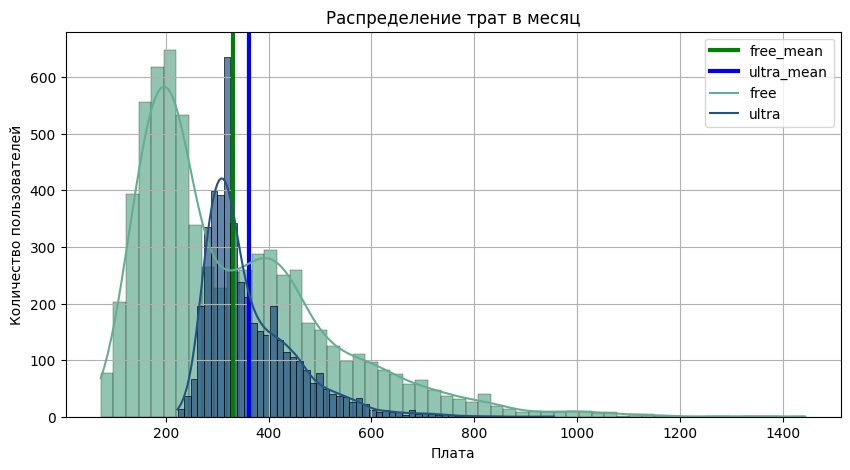

In [63]:
plt.figure(figsize=figsize(2))
plt.axvline(x = free_pivot['pay'].mean(), color = 'g',linewidth=3)
plt.axvline(x = ultra_pivot['pay'].mean(), color = 'b',linewidth=3)
sns.histplot(free_pivot['pay'],color=new_color(4),alpha=alpha,kde=True,linewidth=0.2)
sns.histplot(ultra_pivot['pay'],color=new_color(16),alpha=alpha,kde=True)
plt.title('Распределение трат в месяц')
plt.xlabel('Плата')
plt.ylabel('Количество пользователей')
plt.legend(['free_mean','ultra_mean','free','ultra'])
plt.grid(True)
None

In [64]:
ultra_per_month = ultra_pivot['pay']

free_per_month = free_pivot['pay']


results = st.ttest_ind(ultra_per_month, 
                       free_per_month,
                       alternative = 'greater')

Alpha = 0.05

print(results.pvalue)
print(f'Средняя выручка на платном тарифе {ultra_pivot["pay"].mean()}, средняя выручка на бесплатном тарифе {free_pivot["pay"].mean()}')

if results.pvalue < Alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

3.9053057083001405e-27
Средняя выручка на платном тарифе 362.7921906022502, средняя выручка на бесплатном тарифе 331.15710503089144
Отвергаем нулевую гипотезу


#### Вывод
Вероятнее всего, подписчики приносят больше выручки (p-Value близок к 0). Средняя выручка на платном тарифе 361.48, средняя выручка на бесплатном тарифе 328.26

### Гипотеза 4

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

$H_0$ : $\mu_1 = \mu_2$;

$H_1$ : $\mu_1 > \mu_2$,

где $\mu_1$ и $\mu_2$ - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: `scipy.stats.ttest_rel(alternative = 'less')`

### Выводы этапа

Проверили гипотезы:

- Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
    - Отвергли нулевую гипотезу
- Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
    - Не удалось отвергнуть нулевую гипотезу
- Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
    - Отвергли нулевую гипотезу

## Распределения

### Распределение 1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Минимальное количество промокодов: 1161


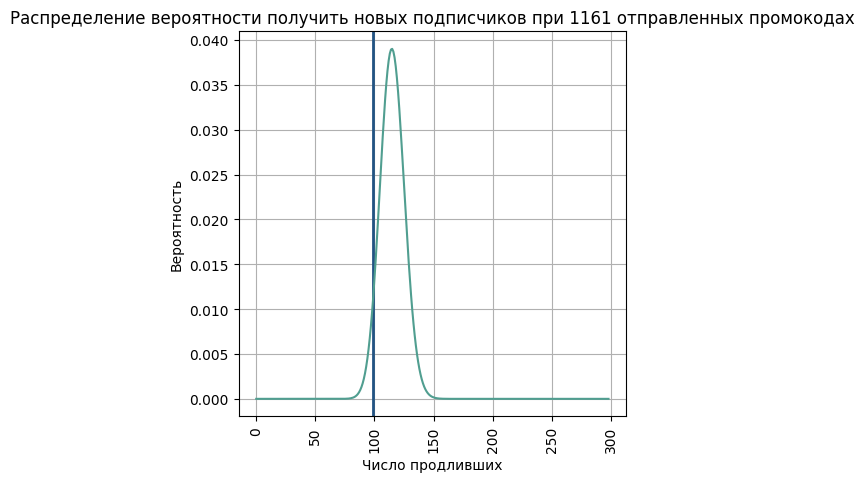

In [65]:
p = 0.1
X = 99
Alpha = 0.05
# Найдем необходимое количество промокодов
N = 99
while st.binom.cdf(X, N, p) > Alpha:
    N += 1
print("Минимальное количество промокодов:", N)
x = list(range(1, 300))
plt.figure(figsize=figsize())
plt.axvline(x = X, color = new_color(),linewidth=2)
plt.plot(st.binom.pmf(x,N,p),color=new_color())
plt.title(f'Распределение вероятности получить новых подписчиков при {N} отправленных промокодах')
plt.xlabel('Число продливших')
plt.ylabel('Вероятность')
plt.xticks(rotation=90)
plt.grid(True)

### Распределение 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что уведомление откроют не более 399.5 тыс. пользователей - 15.37%


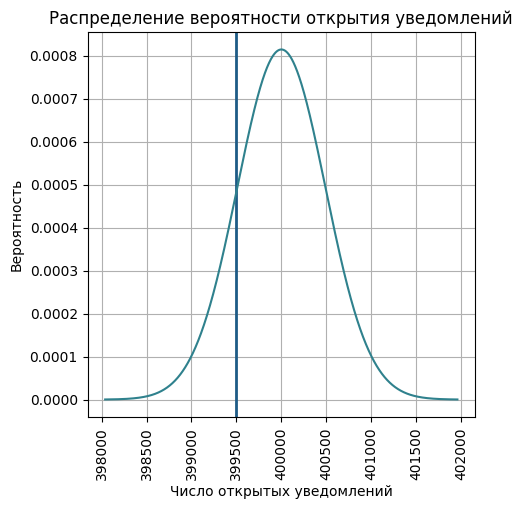

In [66]:
n = 1e6
p = 0.4
X = 399.5e3
mu = p * n
sigma = (p * n * (1 - p)) ** 0.5
left = int(n * p - 4 * (n * p * (1 - p))**0.5)
right = int(n * p + 4 * (n * p * (1 - p))**0.5)
x = list(range(max(0, left), right))
plt.figure(figsize=figsize())
plt.axvline(x = X, color = new_color(),linewidth=2)
plt.plot(x,st.norm.pdf(x,mu,sigma),color=new_color())
plt.title(f'Распределение вероятности открытия уведомлений')
plt.xlabel('Число открытых уведомлений')
plt.xticks(rotation=90)
plt.ylabel('Вероятность')
plt.grid(True)
print(f'Вероятность того, что уведомление откроют не более {X/1e3} тыс. пользователей - {st.norm(mu,sigma).cdf(X):0.2%}')

### Вывод этапа

- Минимальное количество промокодов которое нужно разослать, чтобы вероятность не выполнить план была примерно 5 %: 1172
- Вероятность того, что уведомление откроют не более 399.5 тыс. пользователей - 15.37%


## Вывод

- Изучены данные датафреймов `users_go.csv`, `rides_go.csv` и `subscriptions_go.csv`
    - Пропущенных данных в таблицах нет. Найден 31 дубликат. Все дубликаты в таблице пользователей удалены. Округлены пройденная дистанция до метров и продолжительность до минут. Изменены типы данных: `date` на `datetime64` Добавилен столбец `month` с номер месяца.
    - Обработаны аномальные значения длительности поездок. Ошибки заменены медианными значениями дличельностей поездок тех же расстояний.
    - Частота встречаемости городов
        - Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.

    - Соотношение пользователей с подпиской и без подписки

        - Пользователей, использующих бесплатную подписку больше - 835 человек, что является $\approx54%$ от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является $\approx46%$.

    - Возраст пользователей

        - Самыми младшими являются пользователи 12, 13 лет - аномальные значения.
        - Самыми старшими - 43, 39  - аномальные значения.
        - В целом, пользователи приложения укладываются в промежуток от 20 до 30 лет.

    - Расстояние, которое пользователь преодолел за одну поездку

        - Медианное значение 3134.00. 
        - Аномальные значения меньше 693 и больше 5627

    - Продолжительность поездок

        - Медианное значение 18.00. 
        - Аномальные значения меньше 2.00 и больше 34.00
        
- Данные о пользователях, поездках и тарифах объеденены в один датафрейм - `full_data`.

    - Выделены два датафрейма на основе `full_data`:
        - `free_data` - Информация о пользователях с бесплатным тарифом.
        - `ultra_data` - Информация о пользователях с платным тарифом.

    - Визуализирована информация о расстоянии и времени для каждого из тарифов.
        - Для бесплатного тарифа:
            - В распределении расстояний видно два пика, один около 500 м, второй около 3000.
            - В распределении времени один пик около 18 минут. Есть повышенные значения около 0.
        - Для платного тарифа
            - В распределении расстояний видно два пика, один около 1000 м, второй около 3200.
            - В распределении времени один пик около 20 минут. Нет повышенных значений около 0.
    - Разница в средних расстояниях пользователей с подпиской и без достаточно мала. Однако на платном тарифе несколько выше. Разница в длительности более заметна -- платные пользователи ездят дольше.

    - Создан новый датафрейм с агрегированными данными `total_data` на основе датафрейма с объединенными данными `full_data`.

    - Найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавлен столбец с помесячной выручкой, которую принес каждый пользователь.

        - В среднем польщователи без подписки тратят больше чем пользователи без подписки. Более того, езда без подписки оказывается в большинстве случаев более выгодной.

Проверили гипотезы:

- Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
    - Вероятнее всего, подписчики тратят больше времени на поездки (p-Value близка к нулю). Среднее время на платном тарифе 18.54, среднее время на бесплатном тарифе 17.39
- Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
    - Вероятнее всего, в среднем пользователи с подпиской проезжают за одну поездку около 3130 метров или менее (p-Value - 92%)
- Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
    - Вероятнее всего, подписчики приносят больше выручки (p-Value близок к нулю). Средняя выручка на платном тарифе 361.48, средняя выручка на бесплатном тарифе 328.26
    
Исследованы распределения:
- Минимальное количество промокодов которое нужно разослать, чтобы вероятность не выполнить план была примерно 5 %: 1161
- Вероятность того, что уведомление откроют не более 399.5 тыс. пользователей - 15.37%